# Analisando as Avaliações de Filmes/series IMDB

In [3]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

### Importando a base de dados


In [4]:
vendas_cafe = pd.read_excel('C:/Users/daniel.montanari/Desktop/Project Data Science/datasets/vendas_cafe.xlsx')
vendas_cafe.head(3)

,id_transacao,data_transacao,hora_transacao,qtd_transacao,id_loja,local_loja,id_produto,preco_unitario,categoria_produto,tipo_produto,detalhe_produto
0,106,2023-01-01,11:01:48,1,3,Grão Dourado,22,2.00,Café,Drip coffee - Café Coado,Mistura Nosso Café Antigo Pequeno
1,107,2023-01-01,11:01:58,1,3,Grão Dourado,38,3.75,Café,Barista Espresso,Café com leite
2,108,2023-01-01,11:01:58,1,3,Grão Dourado,75,3.50,Padaria,Pastelaria,Croissant


### Realizando alguns tratamentos e manipulações

In [ ]:
# Combine 'data_transacao' and 'hora_transacao' into a single string
vendas_cafe['data_hora_transacao'] = vendas_cafe['data_transacao'].astype(str) + ' ' + vendas_cafe['hora_transacao'].astype(str)
vendas_cafe['data_hora_transacao'] = pd.to_datetime(vendas_cafe['data_hora_transacao'])

# Extrair o ano, mês e dia da coluna 'data_hora_transacao'
vendas_cafe['ano'] = vendas_cafe['data_hora_transacao'].dt.year
vendas_cafe['mes'] = vendas_cafe['data_hora_transacao'].dt.month
vendas_cafe['dia'] = vendas_cafe['data_hora_transacao'].dt.day

vendas_cafe.dtypes

id_transacao                    int64
data_transacao         datetime64[ns]
hora_transacao                 object
qtd_transacao                   int64
id_loja                         int64
local_loja                     object
id_produto                      int64
preco_unitario                float64
categoria_produto              object
tipo_produto                   object
detalhe_produto                object
data_hora_transacao    datetime64[ns]
ano                             int64
mes                             int64
dia                             int64
dtype: object

In [59]:
# Visualizando a tabela com as alterações realizadas
vendas_cafe.head(6)

,id_transacao,data_transacao,hora_transacao,qtd_transacao,id_loja,local_loja,id_produto,preco_unitario,categoria_produto,tipo_produto,detalhe_produto,data_hora_transacao,ano,mes,dia
0,106,2023-01-01,11:01:48,1,3,Grão Dourado,22,2.00,Café,Drip coffee - Café Coado,Mistura Nosso Café Antigo Pequeno,2023-01-01 11:01:48,2023,1,1
1,107,2023-01-01,11:01:58,1,3,Grão Dourado,38,3.75,Café,Barista Espresso,Café com leite,2023-01-01 11:01:58,2023,1,1
2,108,2023-01-01,11:01:58,1,3,Grão Dourado,75,3.50,Padaria,Pastelaria,Croissant,2023-01-01 11:01:58,2023,1,1
3,112,2023-01-01,11:08:11,1,3,Grão Dourado,59,4.50,Chocolate quente,Chocolate quente - Chocolate,Chocolate Amargo Grande,2023-01-01 11:08:11,2023,1,1
4,114,2023-01-01,11:09:01,1,3,Grão Dourado,59,4.50,Chocolate quente,Chocolate quente - Chocolate,Chocolate Amargo Grande,2023-01-01 11:09:01,2023,1,1
5,115,2023-01-01,11:10:21,1,3,Grão Dourado,47,3.00,Chá,Chá Verde Cozido,Chá Verde Serenidade Grande,2023-01-01 11:10:21,2023,1,1


In [ ]:
# Calcular o valor total da transação
vendas_cafe['valor_total'] = vendas_cafe['qtd_transacao'] * vendas_cafe['preco_unitario']

# Verificar os primeiros dados
vendas_cafe.head()


,id_transacao,data_transacao,hora_transacao,qtd_transacao,id_loja,local_loja,id_produto,preco_unitario,categoria_produto,tipo_produto,detalhe_produto,data_hora_transacao,ano,mes,dia,valor_total,Aumento,Aumento_R$
0,106,2023-01-01,11:01:48,1,3,Grão Dourado,22,2.00,Café,Drip coffee - Café Coado,Mistura Nosso Café Antigo Pequeno,2023-01-01 11:01:48,2023,1,1,2.00,NaN,0.0
1,107,2023-01-01,11:01:58,1,3,Grão Dourado,38,3.75,Café,Barista Espresso,Café com leite,2023-01-01 11:01:58,2023,1,1,3.75,0.0,0.0
2,108,2023-01-01,11:01:58,1,3,Grão Dourado,75,3.50,Padaria,Pastelaria,Croissant,2023-01-01 11:01:58,2023,1,1,3.50,0.0,0.0
3,112,2023-01-01,11:08:11,1,3,Grão Dourado,59,4.50,Chocolate quente,Chocolate quente - Chocolate,Chocolate Amargo Grande,2023-01-01 11:08:11,2023,1,1,4.50,0.0,0.0
4,114,2023-01-01,11:09:01,1,3,Grão Dourado,59,4.50,Chocolate quente,Chocolate quente - Chocolate,Chocolate Amargo Grande,2023-01-01 11:09:01,2023,1,1,4.50,0.0,0.0


In [64]:
# Agrupar as vendas por ano e mês e calcular o total de vendas por mês
vendas_por_mes = vendas_cafe.groupby(['ano', 'mes'])['valor_total'].sum().reset_index()

# Visualizar os resultados
vendas_por_mes.head()


,ano,mes,valor_total
0,2023,1,81677.74
1,2023,2,76145.19
2,2023,3,98834.68
3,2023,4,118941.08
4,2023,5,156727.76


### Analisando visualmente as vendas

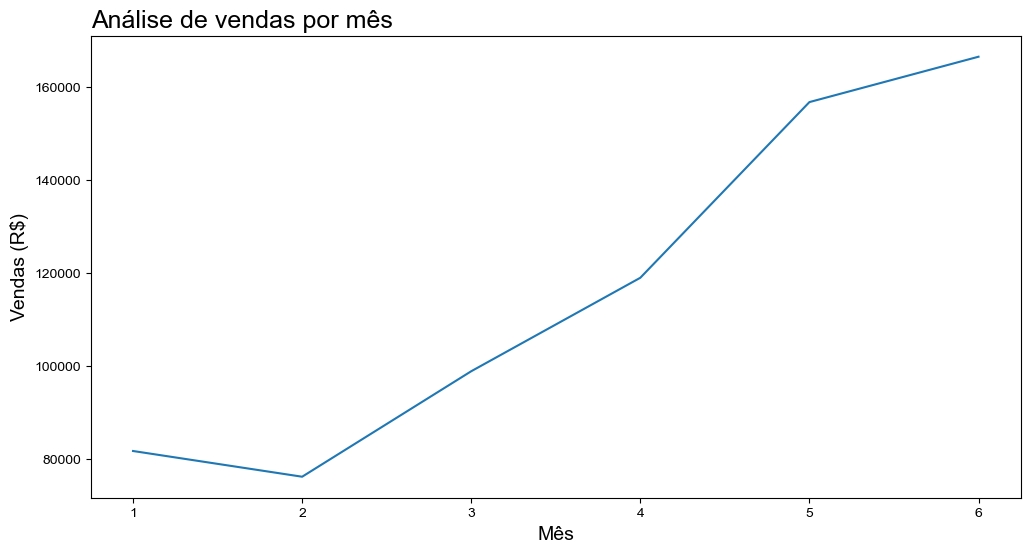

In [65]:
def grafico_lineplot(titulo, labelx, labely, x, y, dataset):
    ax = sns.lineplot(x=x, y=y, data=dataset)
    sns.set_palette('Accent')
    sns.set_style('darkgrid')
    ax.figure.set_size_inches(12, 6)
    ax.set_title(titulo, loc='left', fontsize=18)
    ax.set_xlabel(labelx, fontsize=14)
    ax.set_ylabel(labely, fontsize=14)
    
    # Exibir o gráfico
    plt.show()

# Gráfico de vendas por mês
grafico_lineplot('Análise de vendas por mês', 'Mês', 'Vendas (R$)', 'mes', 'valor_total', vendas_por_mes)


### Analisando visualmente o aumento das vendas

In [83]:
# Calcular a variação percentual das vendas de um mês para o próximo
vendas_por_mes['Variação_Perc'] = vendas_por_mes['valor_total'].pct_change() * 100

# Exibir os dados com a variação percentual
vendas_por_mes[['ano', 'mes', 'valor_total', 'Aumento_R$', 'Variação_Perc']].head()


,ano,mes,valor_total,Aumento_R$,Variação_Perc
0,2023,1,81677.74,NaN,NaN
1,2023,2,76145.19,-5532.55,-6.773633
2,2023,3,98834.68,22689.49,29.797667
3,2023,4,118941.08,20106.40,20.343466
4,2023,5,156727.76,37786.68,31.769242


### Plotando visualização de variação

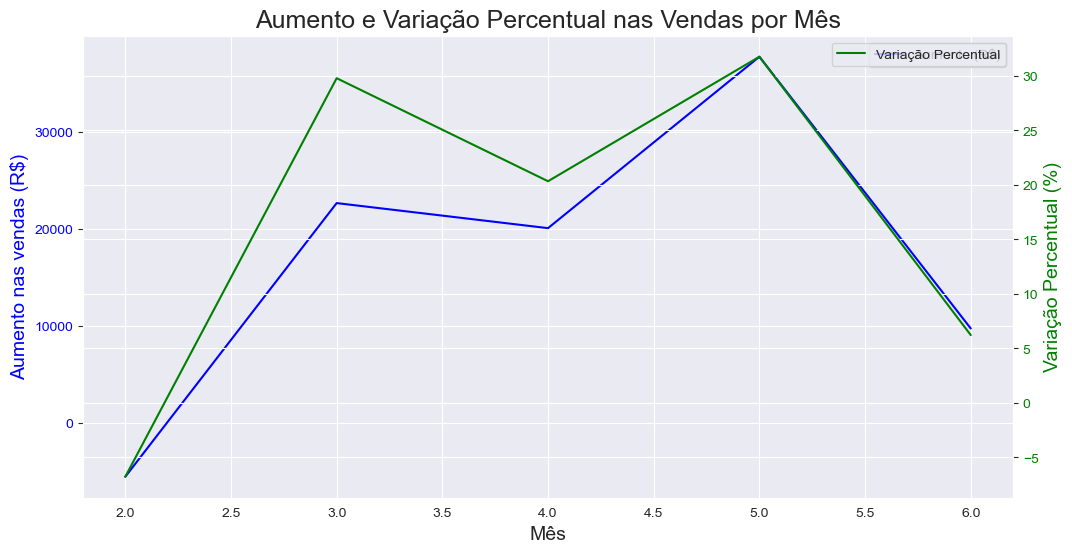

In [84]:
# Gráfico de aumento nas vendas (em R$) e variação percentual por mês
fig, ax1 = plt.subplots(figsize=(12, 6))

# Gráfico de linha para o aumento em R$
sns.lineplot(x='mes', y='Aumento_R$', data=vendas_por_mes, ax=ax1, color='b', label='Aumento (R$)')
ax1.set_xlabel('Mês', fontsize=14)
ax1.set_ylabel('Aumento nas vendas (R$)', fontsize=14, color='b')
ax1.tick_params(axis='y', labelcolor='b')

# Criando o segundo eixo para a variação percentual
ax2 = ax1.twinx()
sns.lineplot(x='mes', y='Variação_Perc', data=vendas_por_mes, ax=ax2, color='g', label='Variação Percentual')
ax2.set_ylabel('Variação Percentual (%)', fontsize=14, color='g')
ax2.tick_params(axis='y', labelcolor='g')

# Título do gráfico
plt.title('Aumento e Variação Percentual nas Vendas por Mês', fontsize=18)
plt.show()


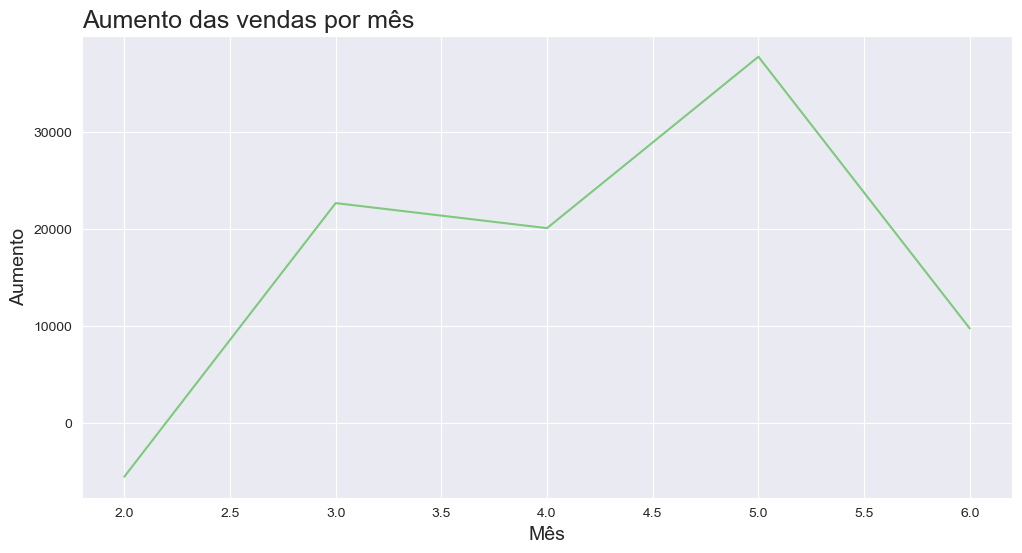

In [89]:
grafico_lineplot('Aumento das vendas por mês', 'Mês', 'Aumento',
                'mes', 'Aumento_R$', vendas_por_mes)

### Analisando por Categoria de Produto

In [90]:
# Agrupar por categoria e somar a quantidade de transações (qtd_transacao)
categoria_vendas_qtd = vendas_cafe.groupby('categoria_produto')['qtd_transacao'].sum().reset_index()

# Ordenar para encontrar a categoria mais vendida
categoria_vendas_qtd = categoria_vendas_qtd.sort_values(by='qtd_transacao', ascending=False)
categoria_vendas_qtd.head(1)


,categoria_produto,qtd_transacao
1,Café,89250


In [91]:
# Calcular o valor total por categoria
vendas_cafe['valor_total'] = vendas_cafe['qtd_transacao'] * vendas_cafe['preco_unitario']

# Agrupar por categoria e somar o valor total das vendas
categoria_vendas_valor = vendas_cafe.groupby('categoria_produto')['valor_total'].sum().reset_index()

# Ordenar para encontrar a categoria com maior valor total
categoria_vendas_valor = categoria_vendas_valor.sort_values(by='valor_total', ascending=False)
categoria_vendas_valor.head(1)


,categoria_produto,valor_total
1,Café,269952.45


### Visualização de vendas por categoria de produto


In [96]:
# Calcular o total de quantidade e valor por categoria
categoria_vendas = vendas_cafe.groupby('categoria_produto').agg(
    qtd_vendida=('qtd_transacao', 'sum'),
    valor_total=('valor_total', 'sum')
).reset_index()

# Ordenar os dados pela quantidade vendida (do maior para o menor)
categoria_vendas = categoria_vendas.sort_values(by='qtd_vendida', ascending=False)

# Exibir os dados ordenados
categoria_vendas.head()


,categoria_produto,qtd_vendida,valor_total
1,Café,89250,269952.45
4,Chá,69737,196405.95
7,Padaria,23214,82315.64
3,Chocolate quente,17457,72416.00
8,Sabores,10511,8408.80


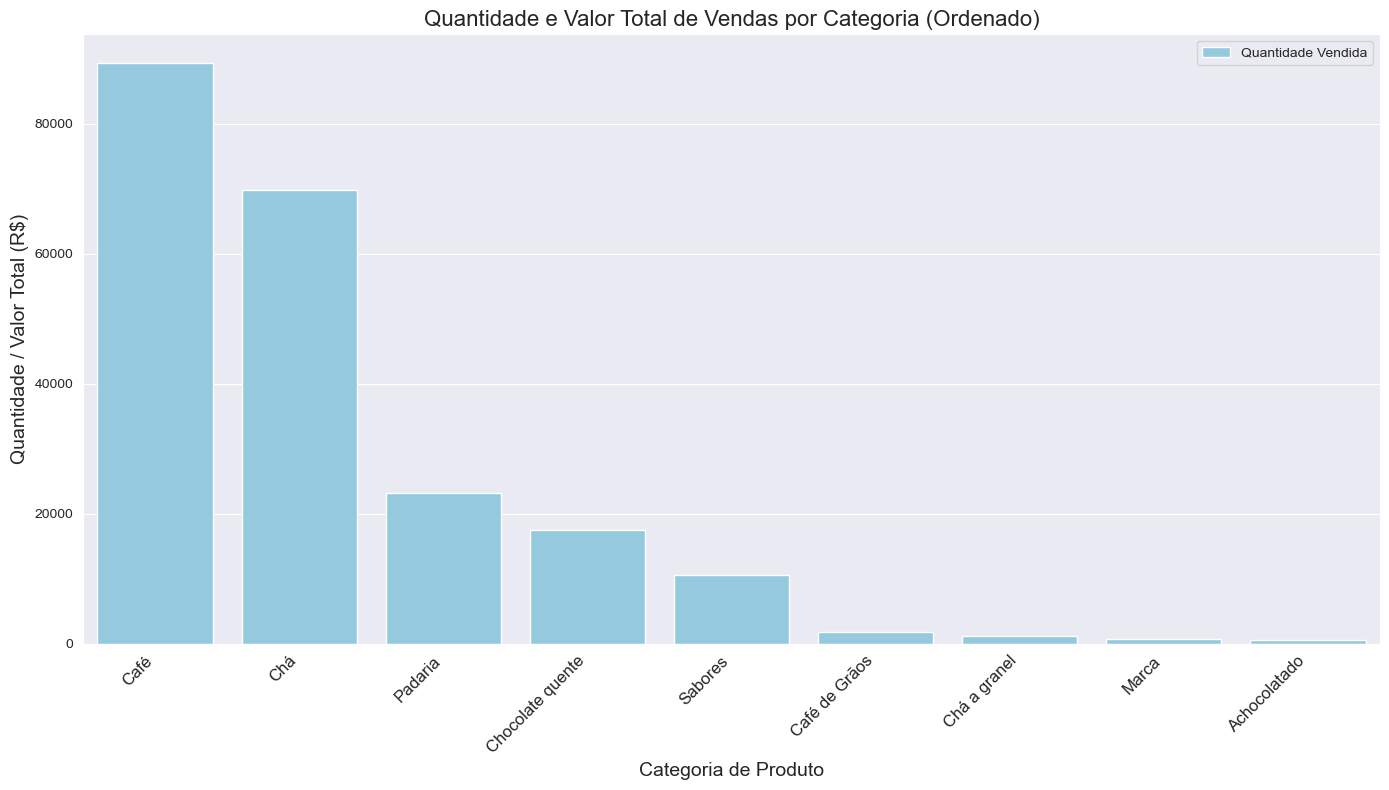

In [100]:
# Definir o tamanho do gráfico
plt.figure(figsize=(14, 8))

# Plotar as barras para quantidade de vendas
sns.barplot(x='categoria_produto', y='qtd_vendida', data=categoria_vendas, color='skyblue', label='Quantidade Vendida')

# Adicionar rótulos e título
plt.title('Quantidade e Valor Total de Vendas por Categoria (Ordenado)', fontsize=16)
plt.xlabel('Categoria de Produto', fontsize=14)
plt.ylabel('Quantidade / Valor Total (R$)', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.legend()

# Exibir o gráfico
plt.tight_layout()
plt.show()

### Analisando por Lojas

In [5]:
# Agrupar por loja e somar a quantidade de transações
vendas_por_loja = vendas_cafe.groupby('local_loja')['qtd_transacao'].sum().reset_index()

# Ordenar os dados para ver a loja com maior quantidade vendida
vendas_por_loja = vendas_por_loja.sort_values(by='qtd_transacao', ascending=False)
vendas_por_loja.head()

,local_loja,qtd_transacao
0,Aromas Divino's,71742
1,Cantinho do Café,71737
2,Grão Dourado,70991


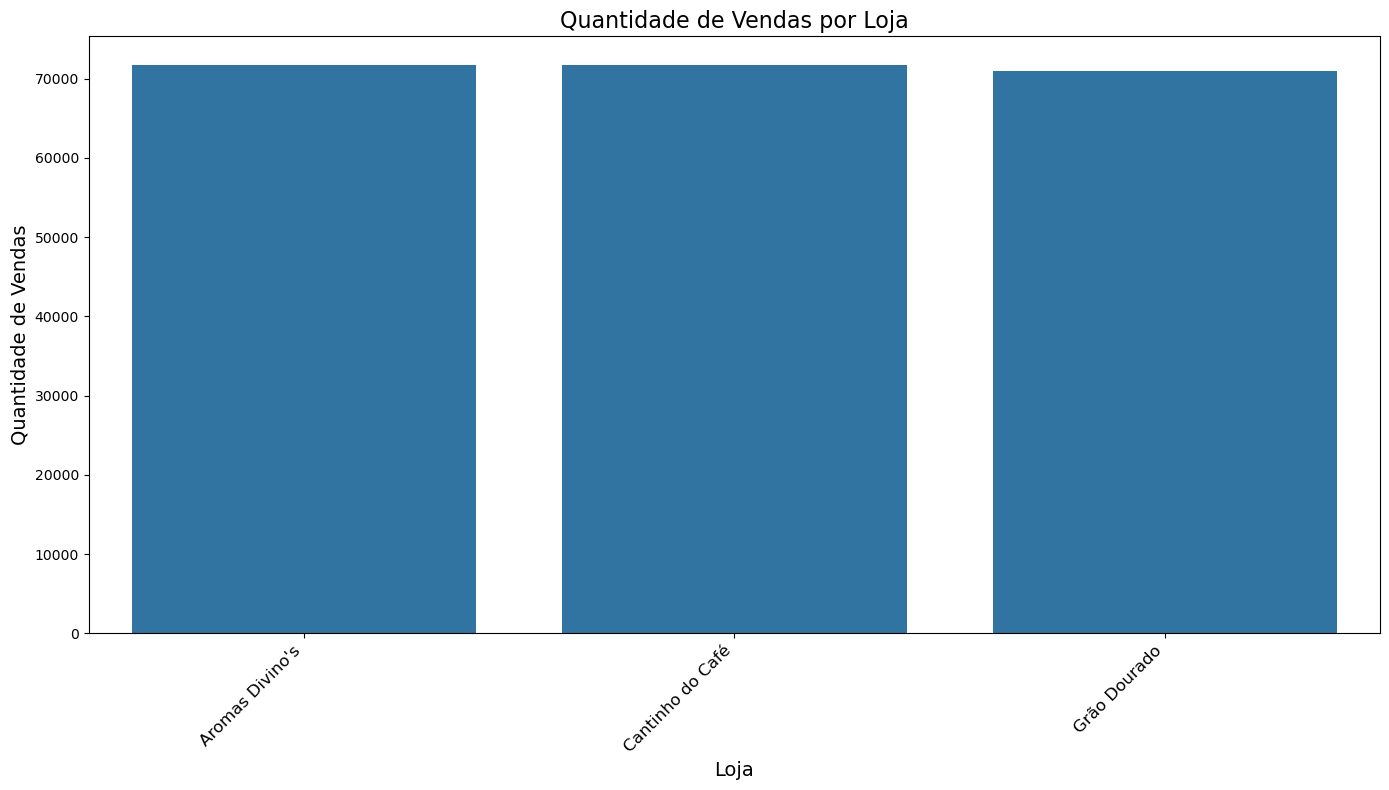

In [9]:
# Definir o tamanho do gráfico
plt.figure(figsize=(14, 8))

# Plotar as barras para quantidade de vendas por loja (sem o `palette`)
sns.barplot(x='local_loja', y='qtd_transacao', data=vendas_por_loja)

# Adicionar rótulos e título
plt.title('Quantidade de Vendas por Loja', fontsize=16)
plt.xlabel('Loja', fontsize=14)
plt.ylabel('Quantidade de Vendas', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)

# Exibir o gráfico
plt.tight_layout()
plt.show()